# Setup

**Imports**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelmax, periodogram
from statsmodels.tsa.stattools import acf, adfuller, kpss, pacf
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import cmath

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Utility functions**

In [ ]:
def fig_ax(figsize=(15, 5)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.autoscale(enable=True, axis='x', tight=True)
    return fig, ax

In [ ]:
signal_question_3 = np.array([-314.530206875043, -305.893603153148, -297.742428854704, -292.805918371929, -291.593378997245, -294.439977349931, -301.254974281019, -310.550577933854, -318.541544831899, -321.048064065974, -318.793029618733, -313.449985396738, -308.210469104715, -303.700650655269, -298.883536120163, -294.023633932335, -289.545684788744, -286.177201032858, -285.441483269325, -286.05707194606, -286.275230864287, -287.662341388003, -289.886258130559, -289.824376419757, -285.802296122559, -278.11436771052, -270.236655392955, -263.513948933188, -258.431083939723, -255.750452776027, -257.211335300287, -263.457240388078, -272.994583084146, -285.148541971403, -297.983759971483, -310.284365206086, -322.109977570127, -333.192382131553, -341.551870973546, -344.021306168979, -340.846135611769, -335.548891843136, -330.607092634961, -327.780475141048, -327.848782122534, -330.77538597133, -334.569314167317, -336.380320246504, -335.907586447179, -333.381767890002, -328.226927837092, -321.279390318206, -313.721068674831, -306.501775365236, -301.467405554226, -299.646690486801, -300.967201819093, -304.496350510173, -306.64011438038, -305.12317599174, -302.062067987967, -300.506711624146, -300.510377437259, -302.057471418937, -303.802696834832, -304.303974490483, -302.53263384301, -298.278796961199, -292.458069902426, -286.948407386407, -283.312560944513, -281.967770385354, -282.393178272156, -284.259140601227, -286.017592717331, -287.354149838545, -289.396996774281, -292.361048801587, -294.901176370856, -296.884895130083, -297.21404130224, -296.367051547729, -295.493074445063, -295.838502288049, -295.793678114945, -296.125608798242, -298.93937073642, -303.160522021026, -306.707294148024, -307.524249352305, -303.595920016214, -295.202643276352, -286.161223119636, -278.592775910541, -274.006842499415, -273.87913025813, -278.916832918911, -287.933630021427, -298.481398432447, -309.030824002493, -318.636264673811, -325.939123516295, -329.487961503972, -328.183861845536, -321.957400830217, -312.192535136156, -301.764724761549, -291.063894155108, -280.882170810146, -273.884766663706, -273.230723178207, -280.458175949315, -293.316311385814, -308.242550670035, -320.580399945874, -326.926534075608, -325.956481149088, -319.103573630706, -309.872359174798, -302.56309632752, -299.005224572126, -300.505386159156, -306.841498423268, -314.369124989831, -320.068174853122, -321.270510909025, -320.99036275324, -322.8079495767, -324.522339497365, -327.36397762712, -332.04887265484, -336.165716957593, -340.127558865739, -343.513428175095, -345.403297498746, -347.180479098304, -350.024077592059, -354.178639023166, -358.936598201982, -363.441483588779, -367.471292940504, -371.322922523118, -373.327039966717, -373.34258697558, -372.718641825531, -373.852701711225, -376.919811882731, -381.642377162116, -386.695250794093, -391.328724947071, -394.242017016373, -394.935393324818, -392.649326554602, -388.923858595822, -384.648078043896, -380.736652663233, -378.904863745009, -379.951341690633, -386.036997889295, -395.176757290433, -403.308218584647, -407.700263723249, -407.265044486268, -404.617421903671, -401.18868161658, -396.721545405679, -391.740686600226, -388.777798246121, -388.934969156747, -393.690159544185, -402.366252323073, -412.028167354077, -419.198896013544, -422.158450312219, -420.96526412863, -417.513241228021, -411.401259594545, -404.372591613685, -398.854298276782, -396.043726607854, -395.689261739802, -397.55948227863, -401.30451514313, -405.505158002297, -409.69153339533, -413.280944185156, -414.499212839455, -414.164422339724, -413.686973555121, -413.128472798648, -412.392361745089, -411.916501522556, -411.301312988184, -409.800807435231, -407.584171518324, -406.796624124538, -408.523163483628, -410.879373757293, -412.415040319543, -414.0870607027, -416.360721225278, -418.418980898057, -420.732655554453, -423.505154077399, -425.118890895961, -426.428445295854, -429.358003521363, -434.99681653047, -442.166006515675, -448.212641773473, -453.02058313275, -456.66688349021, -456.372440961506, -451.122345726158, -441.55047045891, -429.270923645416, -417.202802897073, -409.082787716964, -405.901528105269, -407.788889000886, -412.270608724925, -415.757933744931, -416.444349188562, -414.381804525142, -411.752427368168, -408.594380723226, -404.004532619252, -399.227029578854, -394.742615022999, -389.159644463937, -383.265695042137, -379.070356025979, -378.09957727001, -381.211421977028, -388.786135505256, -398.323046393825, -406.646497568424, -410.274625491301, -409.756866185221, -406.564039542154, -401.524630896287, -395.233835966599, -389.787846569965, -386.159812000697, -384.272845375733, -383.267088696964, -382.304361380268, -380.827894201716, -380.102786840716, -380.696086210271, -382.311911808193, -384.019507247942, -386.819330031123, -390.562010481058, -393.318720507274, -392.245932246864, -386.505194938519, -376.33579231345, -365.684470456084, -359.299938979549, -358.856796279154, -362.540419972867, -369.836680839126, -378.382584642414, -385.330173367921, -389.706594947595, -389.964268320519, -387.719536087236, -386.492831674173, -386.829578175234, -386.976846070152, -387.205710699667, -387.562783112051, -388.186827089698, -388.267574871371, -386.177964386866, -381.850217237655, -376.777625301194, -372.06657407383, -368.299417322065, -365.146397867515, -363.240671058, -361.979162759553, -358.976588485588, -354.698467337733, -350.676785441966, -346.330965484447, -340.993537598931, -335.541999007941, -330.759781403536, -327.850462729911, -327.484281990842, -328.235273264632, -329.98199671025, -331.596824786207, -333.659513731134, -336.483608615722, -338.4896931337, -338.81793896137, -338.715370967623, -339.221885134386, -341.49133612233, -345.399538072682, -349.748031550887, -355.629488537465, -361.780742478641, -365.660822523012, -364.345114470468, -359.142985603047, -351.938384927793, -344.627969286585, -338.259392722549, -334.314339514404, -332.540946292403, -333.716159568324, -337.737965404334, -343.659337448747, -350.620826189887, -356.679410467397, -361.052130229964, -363.558273969134, -364.622175244344, -365.748985821009, -365.69731089719, -362.788424853844, -359.084464834508, -355.96125097247, -353.831800010778, -352.693041263379, -352.604326233293, -353.011872845917, -353.564217331304, -353.885135110413, -353.008556816793, -352.997335990131, -354.777216469917, -358.493187894559, -363.507047389291, -370.274013965021, -377.48852448829, -383.441488364436, -387.485213727019, -389.946839715943, -388.380617890205, -383.529355885402, -377.212248708146, -370.307666657554, -364.565223840256, -361.46225854178, -361.286361858826, -364.080120302606, -369.673976953949, -373.455162053314, -375.179733978221, -376.599803513793, -378.422817040403, -380.711989226456, -383.29464266129, -385.108670837083, -386.725387666539, -387.17932868506, -384.973903346498, -381.54587392192, -378.848524066329, -378.268425970362, -379.757050414818, -381.935392775186, -384.658542519218, -387.60599696164, -390.301325540049, -392.018906772859, -392.052867944639, -391.880599343257, -392.44219174073, -392.690866810934, -393.068755064371, -392.56780200903, -390.950815618284, -389.279705252631, -387.097986838363, -384.781070656298, -381.964197762686, -381.246223322444, -382.851068049548, -385.282449374093, -387.883236612476, -389.504159038875, -389.658345441976, -388.33490449475, -384.777712358466, -380.134984988356, -376.147989892895, -372.440049468224, -368.060360660315, -365.025185149559, -363.113017619804, -362.234322288046, -361.615089002272, -360.781736294988, -359.622362414368, -358.307558498572, -356.329908661579, -354.375539464906, -351.610096183319, -347.320478802327, -342.738697491061, -340.725260223874, -340.424941178916, -340.607491299655, -341.376342860159, -343.664577668381, -346.675853435781, -349.616161355186, -353.608239554943, -357.519235532367, -359.699915727738, -360.112052091371, -359.794383722327, -358.300644932609, -357.787214517464, -357.52685221691, -356.559476280875, -355.954032632038, -354.374592040555, -351.407634061366, -349.587044969469, -350.101003879486, -351.562026248676, -353.384029244657, -353.998398779522, -352.637065299674, -348.202313434678, -342.398216932829, -337.770742236691, -334.790562317825, -334.154710200438, -335.530413384299, -337.548729953636, -339.642412254527, -341.437720738424, -342.868500211447, -346.456519149856, -352.185527056043, -357.262364278128, -359.713165834264, -360.15356335338, -359.792401020299, -359.613470664179, -359.375520415338, -358.935002834082, -358.621781710744, -358.322217219819, -356.979336217377, -353.446810797048, -348.319133893795, -342.807960113456, -338.941745797222, -337.772068884147, -338.534964972307, -339.52100994119, -340.125079029592, -339.145847940914, -336.66307395913, -333.974648967748, -331.532161332504, -330.032922612533, -329.454966481229, -332.009261320219, -340.269062514247, -349.359584164526, -354.664403644013, -355.631369980374, -351.840990735334, -344.249708635899, -336.709686791153, -332.492587272258, -331.469738441729, -332.680273441858, -334.77409640782, -336.921268250579, -339.799285866081, -342.589758494491, -345.596104726895, -349.230131399559, -351.616421519131, -352.358162054381, -354.614128770734, -358.315844686811, -361.848712045796, -365.619787917494, -370.277960531854, -376.095648280498, -379.421169973233, -378.151089972421, -372.760125282669, -363.567712819735, -353.544904660545, -346.015666734945, -343.724299689897, -346.541726816402, -352.644517174139, -360.007706531765, -366.279469178058, -369.615590907855, -371.021496163389, -371.045683849365, -369.385780828558, -365.674075802836, -360.60341981737, -356.106879622862, -353.826428021353, -355.131598027615, -358.006625232927, -360.165799080782, -361.765473705099, -363.102172477158, -365.902997933385, -369.644136817052, -372.224140780586, -372.658337605836, -370.84516245768, -366.40355480258, -360.194552802105, -353.891955538288, -349.520754568351, -346.30525250364, -344.252648999313, -343.44140305873, -342.448888742847, -340.809386785278, -339.191805344208, -337.769117552239, -335.868591240478, -334.290177202318, -332.670252486742, -329.511748821906, -325.557202722377, -320.520084069428, -316.89220415237, -317.303698588389, -319.920597025969, -320.998811366133, -320.092098335308, -317.936019065987, -315.391352704951, -311.932306424942, -307.885007261012, -305.285859804628, -306.094451747537, -310.130196398468, -315.716230632986, -321.711351414068, -328.865456851787, -336.762566659903, -342.813174716095, -345.27557145556, -345.784180703113, -345.926673103455, -345.467363921847, -344.779501547987, -343.844031610314, -343.750222378004, -345.622102285788, -348.353189964079, -351.196516409478, -352.968727104093, -352.645421450375, -351.05274595489, -348.700453494346, -346.820606158877, -347.09092848715, -348.552436698573, -350.229530439203, -351.676402331324, -351.824430330403, -351.90332321029, -352.178591698141, -352.123254329331, -352.958394554334, -354.390328191851, -355.625048626749, -355.916848089122, -353.883684530138, -350.900919472716, -348.977730687951, -347.880313578195, -347.041814388779, -345.300314445455, -342.351101456017, -337.750607624085, -332.069316859621, -327.830101022826, -324.692850271199, -322.610534565108, -321.332511360967, -320.942056222356, -322.423623954354, -326.296879040222, -329.933172890191, -331.199092582366, -331.069837826691, -330.054525990868, -328.128926520509, -327.470136821948, -331.597014053025, -339.608351137742, -348.721961805224, -357.012801639853, -363.54010588633, -370.198726172287, -377.218341302916, -380.979433131361, -378.907034940052, -371.633580861915, -362.083445716546, -354.391952910599, -351.605357956247, -355.230591881011, -362.520899071779, -371.13289739592, -380.252947704118, -388.185212517497, -391.769221132563, -391.585619505926, -387.309375861627, -380.363661490559, -373.797990081489, -370.30131810676, -369.550439529797, -370.170485524549, -371.641853188129, -373.290852058875, -374.632994502039, -376.223742570522, -378.488047331811, -382.178032952024, -386.383634917975, -388.840868959868, -389.011068164156, -386.792028818471, -384.024373055309, -381.215991725215, -378.772511338203, -377.640307601725, -377.624217115117, -376.759303861199, -375.36592498743, -376.469238984823, -381.170932394034, -387.765100082345, -393.135784448947, -396.98400561723, -398.230416410461, -398.713849487919, -399.204951777934, -399.192076826883, -399.676026950207, -400.688290291775, -401.759727355036, -401.967303697578, -401.833957689998, -403.437213398043, -408.260715491751, -416.024194537154, -424.520725192743, -431.094806245147, -435.753723504383, -438.50682520863, -439.120968858951, -438.9727690625, -438.283752068942, -436.013598678967, -432.921678418708, -430.042068155563, -425.661239638802, -419.376273483178, -412.563123202957, -407.727838056527, -406.77068286307, -407.880802838297, -411.339636006737, -417.549023543129, -423.568182183501, -427.443175682293, -429.23293223074, -431.293752857603, -434.645489442637, -436.933057751776, -437.26632532051, -436.032446695286, -434.30809396816, -435.545723573965, -441.102808148264, -450.716418033994, -460.950789025645, -467.094758171649, -466.015975689917, -459.044085651825, -448.960765470398, -437.445514401377, -426.790099558686, -417.682352556258, -410.867218664744, -407.254902934045, -406.612374719553, -409.079759395662, -414.423624677531, -422.33111559916, -430.724195008411, -437.136622323467, -439.643569084209, -437.179216937862, -430.262027829352, -421.302058486536, -412.949710783424, -405.287426438474, -398.081315474467, -392.268769921054, -389.826480314001, -391.554179853844, -396.122115041987, -400.25777892185, -400.162071837549, -397.813709992659, -395.830541717771, -395.425296157721, -396.494724052212, -398.779081770183, -401.001120953674, -401.932006441777, -401.565249973568, -400.651978387559, -400.071852860341, -400.980792822365, -404.819214722095, -410.42069589912, -415.046522058117, -415.133064951089, -410.989647650182, -405.171349222961, -399.405960582635, -394.969374351332, -390.827114762917, -386.698933237426, -383.801865385514, -381.376932867461, -377.757812582854, -373.077510816224, -369.407935087376, -367.170387353506, -367.195540931048, -369.859282033768, -373.433297977832, -375.480270174657, -376.149710053781, -373.390207202815, -365.925934495985, -356.922277346129, -348.391343924988, -342.850208800542, -341.960272427061, -342.497502310401, -341.188279315314, -338.173003269274, -335.404783862614, -333.634469211013, -333.196049861492, -335.536805267305, -340.351304102641, -345.883076757421, -349.630904495518, -351.028712340906, -351.483950378813, -351.971520832943, -353.821649270821, -356.406775510761, -358.014454360129, -357.174375768904, -353.866211663089, -350.698566982371, -349.235516894726, -348.510520499024, -348.637175413502, -350.667123263645, -354.249794926515, -357.808433873527, -359.699223850553, -359.826824302772, -357.521401383829, -353.211577575963, -347.712699199354, -341.726067363048, -336.425679414328, -335.263150242115, -336.941709353667, -340.036868014244, -344.342596678736, -348.381956168748, -350.454729133875, -350.538769233829, -348.987619766543, -346.576369891945, -342.798914874661, -337.506974491648, -331.635357163481, -327.148600331187, -325.418845052003, -325.555152356053, -324.857566769955, -322.850044045865, -320.128395541861, -316.893616025737, -313.382536076166, -309.459819024387, -306.907806088415, -307.058674746685, -308.805037397644, -311.75202426624, -313.904039034121, -313.787927716511, -312.716459254094, -311.499683041996, -309.980085387149, -308.498211948655, -306.282393453519, -302.969274755698, -300.288703051042, -300.207846595373, -302.377572069311, -304.97275311552, -308.410241505473, -311.57450554019, -312.414323826021, -311.808372476097, -310.312789626157, -307.7359684009, -305.28741365417, -303.401287961827, -303.57800273673, -307.233369104416, -312.91918825764, -319.283542806469, -323.929343755284, -324.306723077773, -321.315194164445, -315.857922579492, -309.552171576772, -305.051664792941, -302.88676386903, -302.542180561797, -305.555849317882, -311.680433163663, -319.000349497817, -324.193472940468, -325.00167446234, -322.055586247504, -315.898674209402, -306.735812289497, -296.008940714676, -286.096668057632, -279.64644425149, -275.097133790927, -273.570842821948, -275.579702064604, -280.782836949681, -288.216086213073, -295.961168240171, -301.572733394852, -306.208010856228, -310.376151337355, -314.299423908187, -316.753303326674, -316.004221411857, -310.473148774398, -302.277210947602, -293.984779823893, -289.032516805191, -287.237513999301, -287.652251072156, -289.135137647317, -292.254570969409, -295.872626172973, -299.628587702626, -304.015434085423, -309.580607689871, -314.437082350255, -316.885948252545, -316.420619277613, -313.923199503242, -309.108475643412, -303.874002686583, -299.893364833195, -297.373930064522, -295.752960380263, -294.058134534691, -292.783595894302, -293.23673338015, -294.302114325229, -294.325577990664, -292.561606037793, -287.880206791126, -280.485997193409, -273.9823247969, -270.182544231342, -268.432616263455, -268.609013032369, -270.695113285881, -273.919445817489, -276.46705050668, -276.966571399454, -274.611765432666, -269.265219886176, -263.756034409452, -257.920704209361, -251.638411340855, -246.069149884626, -241.140857085623, -237.19297430914, -233.554534937791, -229.030869876446, -224.246818233454, -220.704769387388, -218.35244873538, -216.253547465204, -214.380583121059, -212.394122679355, -209.148266695816, -207.640640979794, -207.737261822378, -207.869430309751, -207.765989948551, -208.297527146827, -209.750985494926, -211.590291716803, -212.579024802792, -213.388051048043, -213.292446271081, -211.756405863155, -208.971000656378, -204.732172920541, -200.16380781374, -199.268978031084, -202.748469669327, -208.173898251818, -212.226677050615, -213.313712466567, -212.178377803431, -210.763631681867, -208.329723208015, -205.119679154606, -200.962833604194, -196.297865206868, -192.480531545703, -189.539295275075, -186.452893862034, -184.537247527117, -184.82029620598, -187.495065243983, -190.596027586284, -193.24964905987, -196.602644160608, -199.868319614941, -199.742005045579, -192.588137324213, -179.642854662317, -166.60788532776, -158.345595730248, -155.676005506861, -157.565293832595, -161.80492954968, -164.994962588241, -167.049791880242, -169.396743107747, -171.75126632448, -173.056611672229, -174.292149877582, -175.059274795492, -176.333652685165, -178.390010520245, -178.946832497887, -177.4586472982, -176.033769577651, -176.273837851708, -177.557969647422, -179.770916914014, -183.29672433279, -187.849386485635, -191.40824458246, -193.024051779125, -192.535619351626, -192.217188847026, -194.422238720964, -200.374534568155, -208.442130543816, -215.923953310702, -221.831905977023, -225.400797829787, -226.028959273664, -224.992334216502, -224.049079333029, -224.511746972105])

In [ ]:
n_samples = 2048
tt = np.linspace(0, 1, n_samples)
signal = np.sqrt(tt * (1 - tt)) * np.sin((2.1 * np.pi) / (tt + .05))
signal /= signal.std()
noise = 0.3*np.random.randn(*signal.shape)
snr = 20. * np.log10(signal.std() / noise.std())
signal_question_7 = signal + noise


## Question 2

In [ ]:
s0  = 5
s1 = 3

In [ ]:
s = [s0, s1]

phi1 = 2
phi2 = 0.1

r = cmath.exp((np.pi/3)*1j)

phi1 = 2*np.real(r)/(r*np.conj(r))
phi2 = -1/(r*np.conj(r))

for i in range(1000-2):
    s.append(phi1*s[-1] + phi2*s[-2])


noise = 0.1*np.random.randn(1000)
s = np.array(s) +noise


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


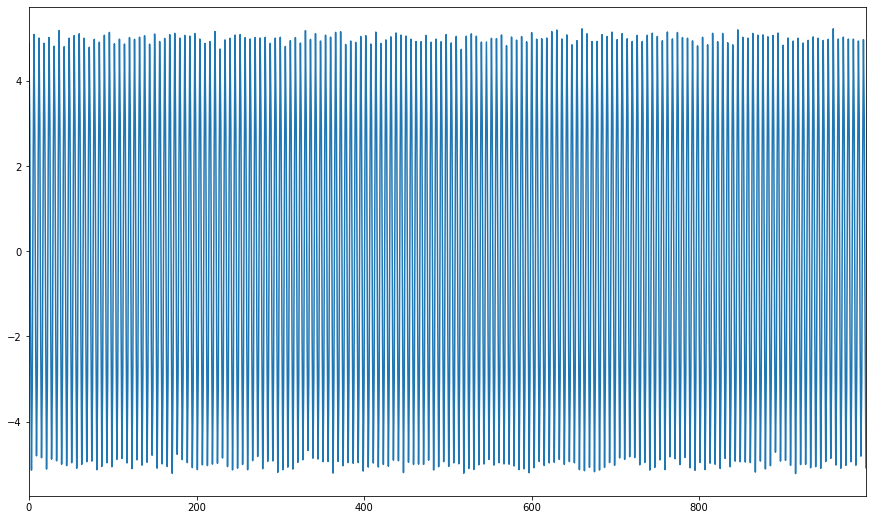

In [ ]:
fig, ax = fig_ax(figsize=(15, 9))
ax.plot(s)
# saving the figure
plt.savefig(fname=f"norm1-signal.pdf", dpi=200, transparent=True, bbox_inches="tight", pad_inches=0)

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


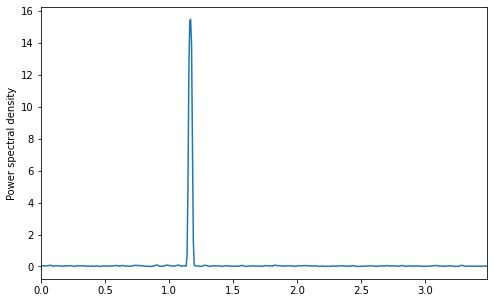

In [ ]:
# compute the periodogram
freqs, Pxx_spec = periodogram(
    x=s,
    fs=n_samples_per_week,
    window="flattop",
)
spectral_density = np.sqrt(Pxx_spec)

# plotting
fig, ax = fig_ax(figsize=(8,5))
ax.plot(freqs[:499], spectral_density[:499])
_ = ax.set_ylabel("Power spectral density")
plt.savefig(fname=f"norm1-periodogram.pdf", dpi=200, transparent=True, bbox_inches="tight", pad_inches=0)

2 complex conjugate roots

In [ ]:
s0  = 1
s1 = 2
s = [s0, s1]

r = 0.99*cmath.exp((2*np.pi/3)*1j)

phi1 = 2*np.real(r)/(r*np.conj(r))
phi2 = -1/(r*np.conj(r))

for i in range(1000-2):
	s.append(phi1*s[-1] + phi2*s[-2])

noise = 0.1*np.random.randn(1000)
s = np.array(s) +noise


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


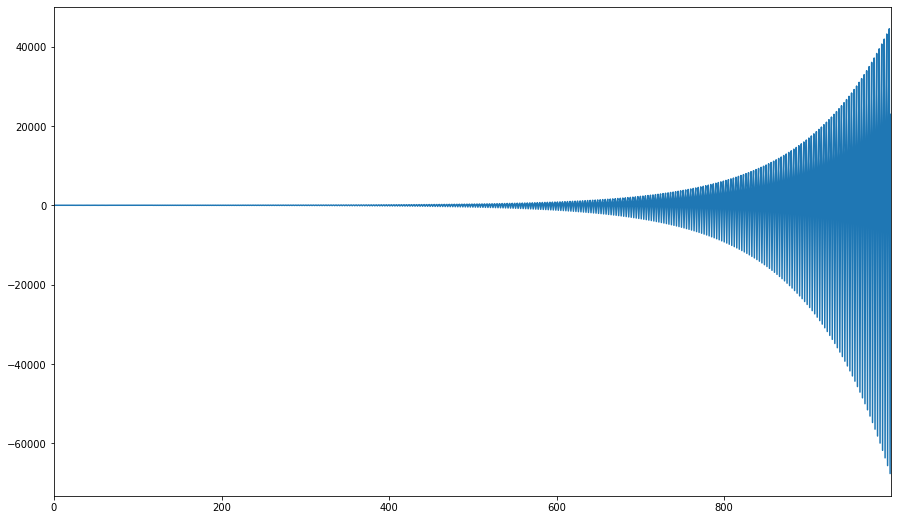

In [ ]:
fig, ax = fig_ax(figsize=(15,9))
ax.plot(s)

# saving the figure
plt.savefig(fname=f"norm.99-signal.pdf", dpi=200, transparent=True, bbox_inches="tight", pad_inches=0)

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


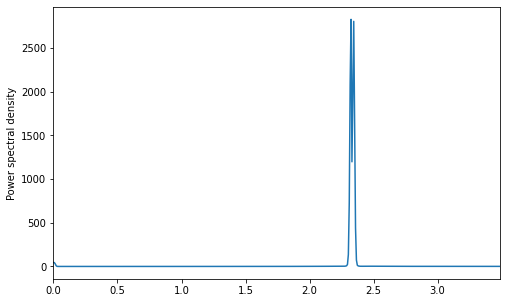

In [ ]:
n_samples_per_week = 7

# compute the periodogram
freqs, Pxx_spec = periodogram(
    x=s,
    fs=n_samples_per_week,
    window="flattop",
)
spectral_density = np.sqrt(Pxx_spec)

# plotting
fig, ax = fig_ax(figsize=(8,5))
ax.plot(freqs[:499], spectral_density[:499])
_ = ax.set_ylabel("Power spectral density")
plt.savefig(fname=f"norm.99-periodogram.pdf", dpi=200, transparent=True, bbox_inches="tight", pad_inches=0)


## Question 3

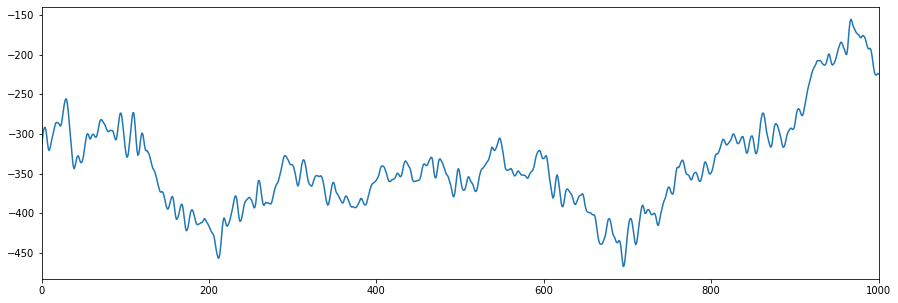

In [ ]:
fig, ax = fig_ax()
ax.plot(signal_question_3)
ax.margins(x=0)

In [ ]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

d =  0
Results of Dickey-Fuller Test:
Test Statistic                  -1.404644
p-value                          0.580048
#Lags Used                      12.000000
Number of Observations Used    988.000000
Critical Value (1%)             -3.436986
Critical Value (5%)             -2.864470
Critical Value (10%)            -2.568330
dtype: float64


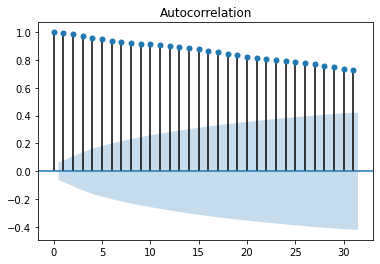

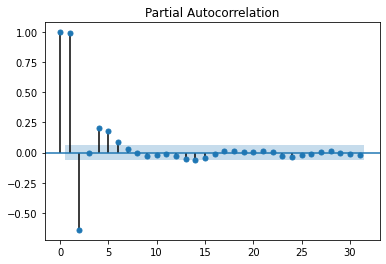

------------------
d =  1
Results of Dickey-Fuller Test:
Test Statistic                -7.660237e+00
p-value                        1.696287e-11
#Lags Used                     1.100000e+01
Number of Observations Used    9.880000e+02
Critical Value (1%)           -3.436986e+00
Critical Value (5%)           -2.864470e+00
Critical Value (10%)          -2.568330e+00
dtype: float64


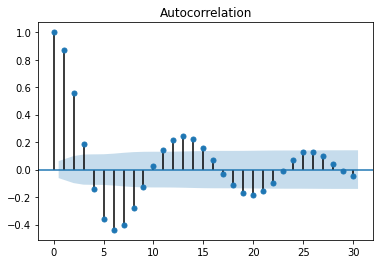

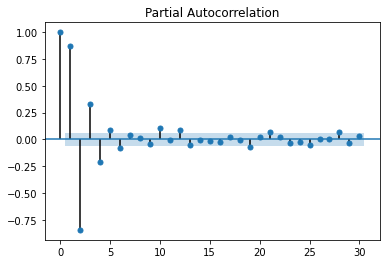

------------------
d =  2
Results of Dickey-Fuller Test:
Test Statistic                -1.216457e+01
p-value                        1.467298e-22
#Lags Used                     2.000000e+01
Number of Observations Used    9.780000e+02
Critical Value (1%)           -3.437054e+00
Critical Value (5%)           -2.864500e+00
Critical Value (10%)          -2.568346e+00
dtype: float64


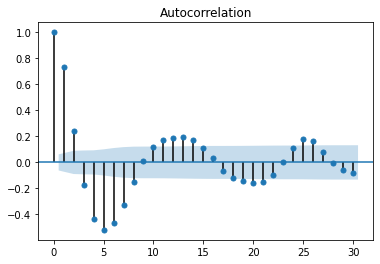

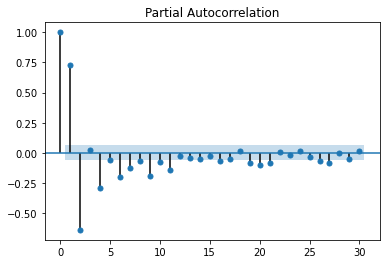

------------------


In [ ]:
diff1= np.diff(signal_question_3, 1)
diff2= np.diff(signal_question_3, 2)

for n_diff in [0,1,2]:
	diff_signal = np.diff(signal_question_3, n_diff)
	print("d = ", n_diff)
	adf_test(diff_signal)
	# fig, (ax_0, ax_1) = plt.subplots(1, 2, figsize=(20, 4))
	
	_ = plot_acf(diff_signal)
	plt.savefig(fname= str(n_diff) + "_ac.pdf", dpi=200, transparent=True, bbox_inches="tight", pad_inches=0)
	
	_ = plot_pacf(diff_signal)
	plt.savefig(fname= str(n_diff) + "_pac.pdf", dpi=200, transparent=True, bbox_inches="tight", pad_inches=0)
	
	plt.show()
	print("------------------")


## Question 5

In [ ]:
import statsmodels.api as sm

In [ ]:
k = 20
n = 500

rejections = 0
for _ in range(500):
    signal = np.random.randn(n)
    ac = sm.tsa.acf(signal, nlags = 20)*np.sqrt(n)
    rejections += (abs(ac[1:]) > 1.96).any()
    
print("Proportion of rejected null hypotheses at level 5%", rejections/n)


Proportion of rejected null hypotheses at level 5% 0.63


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


## Question 6

In [ ]:
k = 20
n = 500

rejections = 0
for _ in range(500):
    signal = np.random.normal(0, 1, size=n)
    p = [(elmt**2)/(n-i) for i, elmt in enumerate(acf(signal, nlags = k)[1:])]
    lb = n * (n+2) * np.sum(p)
    rejections += (lb<10.85)
    
print("Proportion of rejected null hypotheses at level 5%", rejections/n)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Proportion of rejected null hypotheses at level 5% 0.038


## Question 7

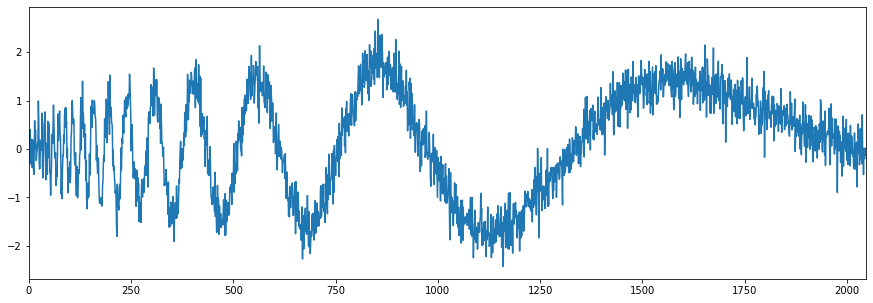

In [ ]:
fig, ax = fig_ax()
ax.plot(signal_question_7)
ax.margins(x=0)

In [ ]:
def phi(L,k):
	us = np.arange(0, 2*L)
	ret = np.sin((us + .5)*np.pi/(2*L))*np.sqrt(2/L)*np.cos( np.pi/L * (us + (L+1)/2)*(k+.5))
	return ret/np.linalg.norm(ret)

In [ ]:
def matching_pursuit(s, K, verbose = 0):
    """ Implementation of Matching Pursuit algorithm

    Parameters
    ----------
    s : ndarray
        Signal to apply MP on
    K : int
        Number of iterations

    Returns
    -------
    (ndarray, ndarray)
        (dictionary, coeffs) the learnt dictionary and asociated coefficients
    """
    Ls= [32, 64, 128, 256, 512, 1024]
    signal = s.copy()

    # Return variables
    d_select = []
    coeffs = []
    residuals = []

    # Compute convolutions with atoms to get scalar products with all shifted atoms
    D = np.array([np.pad(phi(L,k), (0,2048 - 2*L)) for L in Ls for k in range(L//2)])

    for i in range(K):
        # Compute best inner product
        scalar_products = abs(np.array([np.convolve(signal, d[::-1]) for d in D]))
        argmax = np.unravel_index(scalar_products.argmax(), scalar_products.shape)

        # Select the best atom (shifted) and coefficients
        d_star = np.roll(D[argmax[0]], argmax[1])
        z_star = signal@d_star

        # Compute residual
        signal = signal - z_star*d_star

        d_select.append(d_star)
        coeffs.append(z_star)
        residuals.append(signal)

        if verbose:
            print("Iteration", i, "Residual norm:", np.linalg.norm(signal))
    return np.array(d_select), np.array(coeffs), np.array(residuals)




In [ ]:
import time
t = time.time()
d, coefs, residuals = matching_pursuit(signal_question_7, 60, verbose = 1)
print("Execution time", time.time()-t)

Iteration 0 Residual norm: 35.8694290276081
Iteration 1 Residual norm: 30.52713353448541
Iteration 2 Residual norm: 25.0167013778236
Iteration 3 Residual norm: 21.607340759186105
Iteration 4 Residual norm: 19.497687487823363
Iteration 5 Residual norm: 18.0799813461653
Iteration 6 Residual norm: 17.011027790318
Iteration 7 Residual norm: 16.337036998755067
Iteration 8 Residual norm: 15.870678601389562
Iteration 9 Residual norm: 15.469697010334606
Iteration 10 Residual norm: 15.096656634212554
Iteration 11 Residual norm: 14.719680128591259
Iteration 12 Residual norm: 14.477909930170977
Iteration 13 Residual norm: 14.2690842168704
Iteration 14 Residual norm: 14.075699706909464
Iteration 15 Residual norm: 13.978192775189536
Iteration 16 Residual norm: 13.883451413839522
Iteration 17 Residual norm: 13.798749307051164
Iteration 18 Residual norm: 13.727636738573292
Iteration 19 Residual norm: 13.665901068114577
Iteration 20 Residual norm: 13.624757077805278
Iteration 21 Residual norm: 13.5697

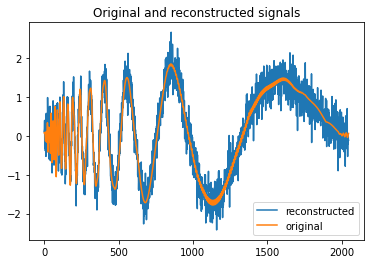

In [ ]:
nb_atoms = 22
plt.title("Original and reconstructed signals")
plt.plot(signal_question_7, label = "reconstructed")
plt.plot(coefs[:nb_atoms]@d[:nb_atoms,:], label = "original")
plt.legend()
plt.savefig(fname=f"original_reconstructed_mp.pdf", dpi=200, transparent=True, bbox_inches="tight", pad_inches=0)



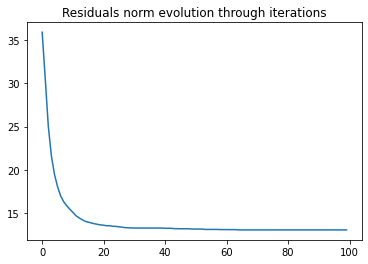

In [ ]:
plt.title("Residuals norm evolution through iterations")
plt.plot([np.linalg.norm(residual) for residual in residuals])
plt.savefig(fname=f"norm_mp.pdf", dpi=200, transparent=True, bbox_inches="tight", pad_inches=0)


In [ ]:
def orthogonal_matching_pursuit(s, K, verbose = 0):
    """ Implementation of Orthogonal Matching Pursuit algorithm

    Parameters
    ----------
    s : ndarray
        Signal to apply MP on
    K : int
        Number of iterations

    Returns
    -------
    (ndarray, ndarray)
        (dictionary, coeffs) the learnt dictionary and asociated coefficients
    """
    Ls= [32, 64, 128, 256, 512, 1024]
    signal = s.copy()


    # Return variables
    d_select = []
    coeffs = []
    residuals = []

    # Build atoms, D store all unshifted atoms
    D = np.array([np.pad(phi(L,k), (0,2048 - 2*L)) for L in Ls for k in range(L//2)])

    for i in range(K):
        # Compute convolutions with atoms to get scalar products with all shifted atoms
        scalar_products = abs(np.array([np.convolve(signal, d[::-1]) for d in D]))

        # Select the best atom (shifted) and coefficients
        argmax = np.unravel_index(scalar_products.argmax(), scalar_products.shape)
        d_star = np.roll(D[argmax[0]], argmax[1])
        d_select.append(d_star)

        # orthogonal projection on selected atoms span of the original signal (from parameter s)
        z_star = np.linalg.lstsq(np.array(d_select).T, s)[0]
        
        # Compute residual using original signal and all projection coefficients
        signal = s - z_star@np.array(d_select)

        coeffs = z_star.copy()
        residuals.append(signal)

        if verbose:
            print("Iteration", i, "Residual norm:", np.linalg.norm(signal))

    return np.array(d_select), np.array(coeffs), np.array(residuals)




In [ ]:
t = time.time()
d_omp, coefs_omp, residuals_omp = orthogonal_matching_pursuit(signal_question_7, 60, verbose = 1)
print("Execution time", time.time()-t)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Iteration 0 Residual norm: 35.8694290276081
Iteration 1 Residual norm: 30.43588775312776
Iteration 2 Residual norm: 24.859359621351278
Iteration 3 Residual norm: 21.402810598379318
Iteration 4 Residual norm: 19.227605013966045
Iteration 5 Residual norm: 17.789437926384654
Iteration 6 Residual norm: 16.89150659815172
Iteration 7 Residual norm: 16.211975927485216
Iteration 8 Residual norm: 15.699353730569133
Iteration 9 Residual norm: 15.331742604501919
Iteration 10 Residual norm: 14.951468314022229
Iteration 11 Residual norm: 14.600392131383
Iteration 12 Residual norm: 14.365073681282508
Iteration 13 Residual norm: 14.196560649062512
Iteration 14 Residual norm: 14.091140961706392
Iteration 15 Residual norm: 13.962382374024664
Iteration 16 Residual norm: 13.860081942930055
Iteration 17 Residual norm: 13.789639768982966
Iteration 18 Residual norm: 13.716112623944706
Iteration 19 Residual norm: 13.64233747430536
Iteration 20 Residual norm: 13.564502939437444
Iteration 21 Residual norm: 13.

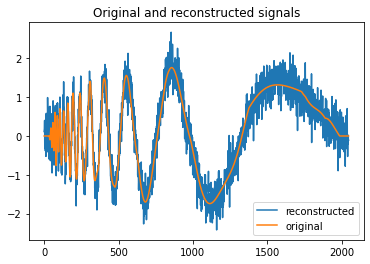

In [ ]:
plt.title("Original and reconstructed signals")

nb_atoms = 15

plt.plot(signal_question_7, label = "reconstructed")
plt.plot(coefs_omp[:nb_atoms]@d_omp[:nb_atoms, :], label = "original")
plt.legend()
plt.savefig(fname=f"original_reconstructed_omp.pdf", dpi=200, transparent=True, bbox_inches="tight", pad_inches=0)


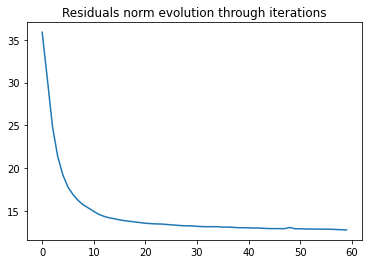

In [ ]:
plt.title("Residuals norm evolution through iterations")
plt.plot([np.linalg.norm(residual) for residual in residuals_omp])
plt.savefig(fname=f"norm_evol_omp.pdf", dpi=200, transparent=True, bbox_inches="tight", pad_inches=0)
